In [75]:
%run data_prep.ipynb

How many people with Covid-19 have died worldwide? 

In [76]:
global_dead_df['dead'].iloc[-1]

291942.0

Dead over time 

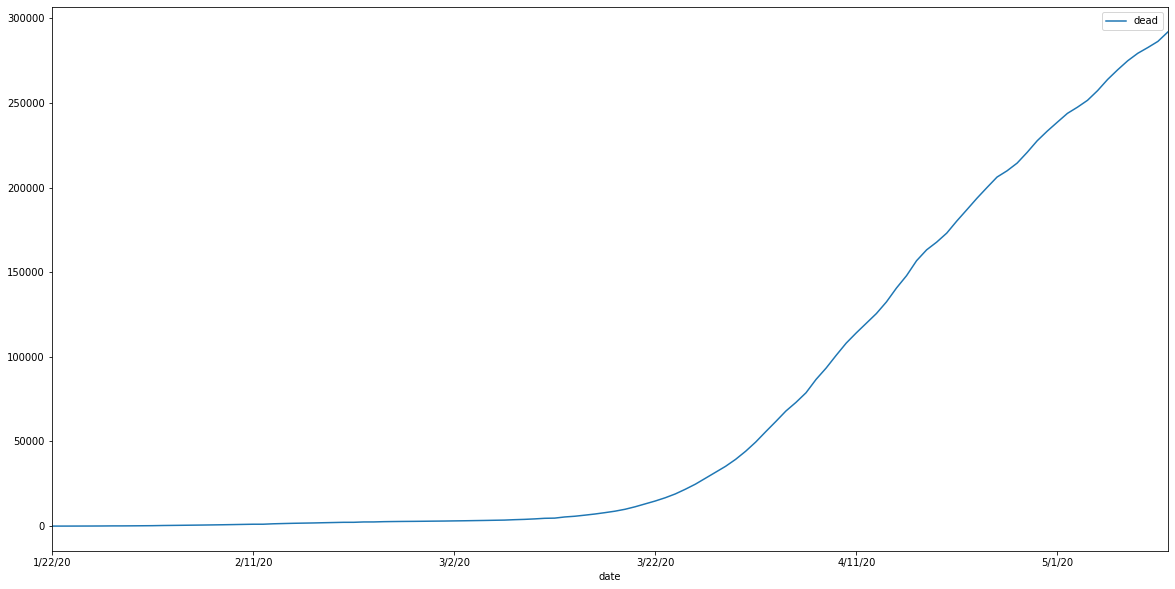

In [77]:
import matplotlib.pyplot as plt
global_dead_df.plot.line(x = 'date', y='dead', figsize=(20,10))

In [78]:
global_dead_df.head()

,date,dead
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0


Which countries have most dead?

In [18]:
newest = country_total_df.iloc[:,[1,-1]]
newest.columns=['country','dead']


newest = newest[pd.to_numeric(newest['dead'], errors='coerce').notnull()]


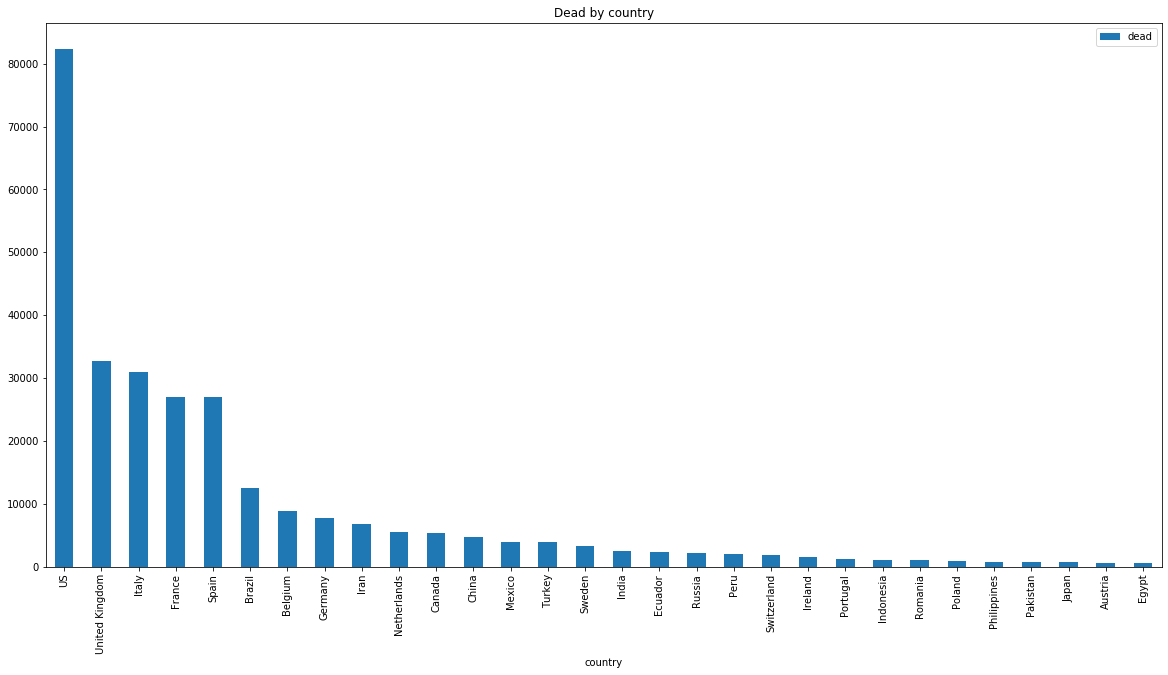

In [19]:
newest.sort_values(by='dead', ascending=False)[:30].plot.bar(title='Dead by country', x = 'country', y='dead', figsize=(20,10))

What happens if we look at dead per million instead?

In [22]:
newest = dead_per_million_df.iloc[:,[1,-2]]
newest.columns=['country','dead']


newest = newest[pd.to_numeric(newest['dead'], errors='coerce').notnull()]


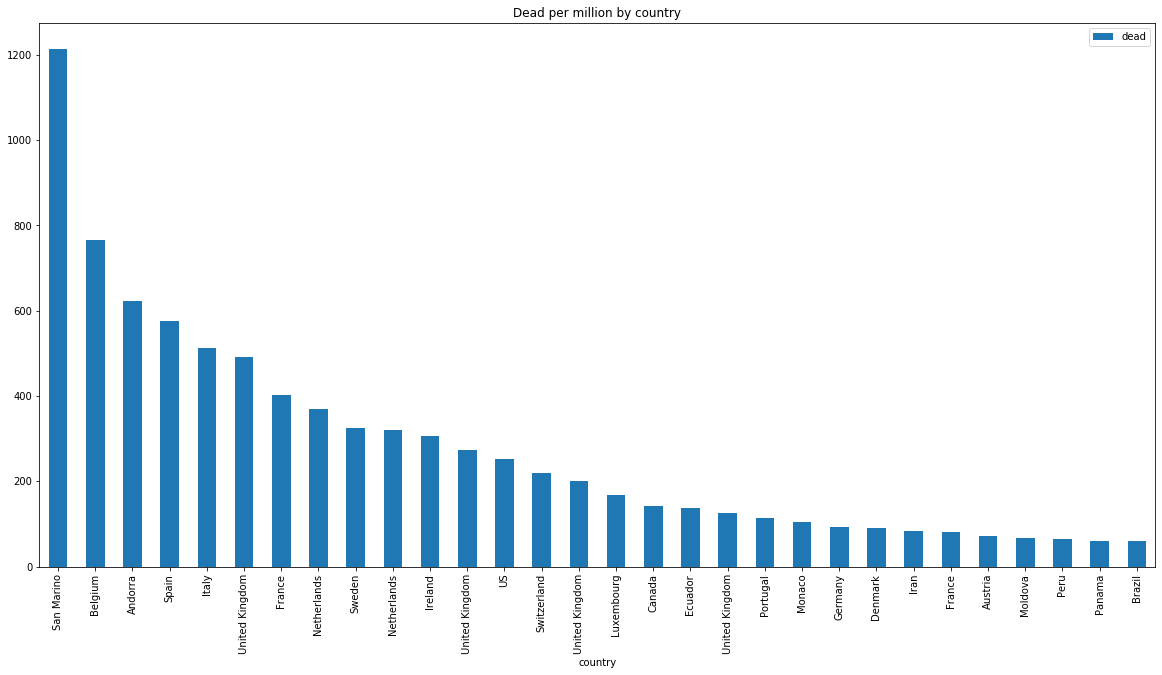

In [23]:
newest.sort_values(by='dead', ascending=False)[:30].plot.bar(title='Dead per million by country', x = 'country', y='dead', figsize=(20,10))

A different picture. Might be more relevant.

## Countermeasures

It is interesting to look at when countries initiated the first countermeasures. This overview is created using the stringency index which will be above 0 if any countermeasures have been initiated. 

When were the first countermeasures initiated? For this the stringency index is used, as this will be above 0 when any countermeasures have been initiated.

First we filter out the countries with no data. 

In [9]:
#Store the two country columns
country_cols = countermeasure_dfs['stringencyindex_legacy'].columns[0:2]
#Store all date columns
date_cols = countermeasure_dfs['stringencyindex_legacy'].columns[3:]
#Create a new dataframe for the new data
stringency_df = pd.DataFrame()
#Copy the country columns
stringency_df[country_cols] = countermeasure_dfs['stringencyindex_legacy'][country_cols]
#Convert the date columns to numeric which will ressult in the 'No data' values to be converted to NaNs
stringency_df[date_cols] = countermeasure_dfs['stringencyindex_legacy'][date_cols].apply(pd.to_numeric, errors='coerce', axis=1)


In [11]:
#Drop rows with NaN values
stringency_df =stringency_df.dropna(subset=date_cols, how = 'all').reset_index(drop=True)

In [13]:
import numpy as np


def getFirst(l):
    if (len(l) > 0):
        return l[0]
    else:
        return len(date_cols)

stringency_cols = []
for i in range(10):
    stringency_cols.append('above_'+ str(i*10))
    stringency_df['above_'+ str(i*10)] = stringency_df.iloc[:,3:len(date_cols)+2].apply(lambda x: (np.where( x > (i*10))[0]), axis=1)
    stringency_df['above_'+ str(i*10)] = stringency_df['above_'+ str(i*10)].apply(getFirst)

    

In [14]:
len(stringency_df.iloc[:,3:].columns)

141

In [15]:
stringency_df.head()

,country,country_code,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,...,above_0,above_10,above_20,above_30,above_40,above_50,above_60,above_70,above_80,above_90
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,72,73,73,75,78,78,86,86,106,120
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58,58,58,71,71,81,82,85,132,132
2,Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34,77,81,81,81,82,84,84,84,84
3,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53,66,66,66,67,68,70,70,72,132
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70,70,71,71,73,82,82,96,132,132


Sort values by date of first countermeasure

In [16]:
stringency_df.sort_values(by='above_0')[['country','above_0']]

,country,above_0
103,Nigeria,0
61,Hong Kong,0
126,Singapore,0
145,Taiwan,0
88,Macao,0
95,Mongolia,0
24,Botswana,0
65,Indonesia,0
23,Brunei,3
94,Myanmar,3


#### Visualizing

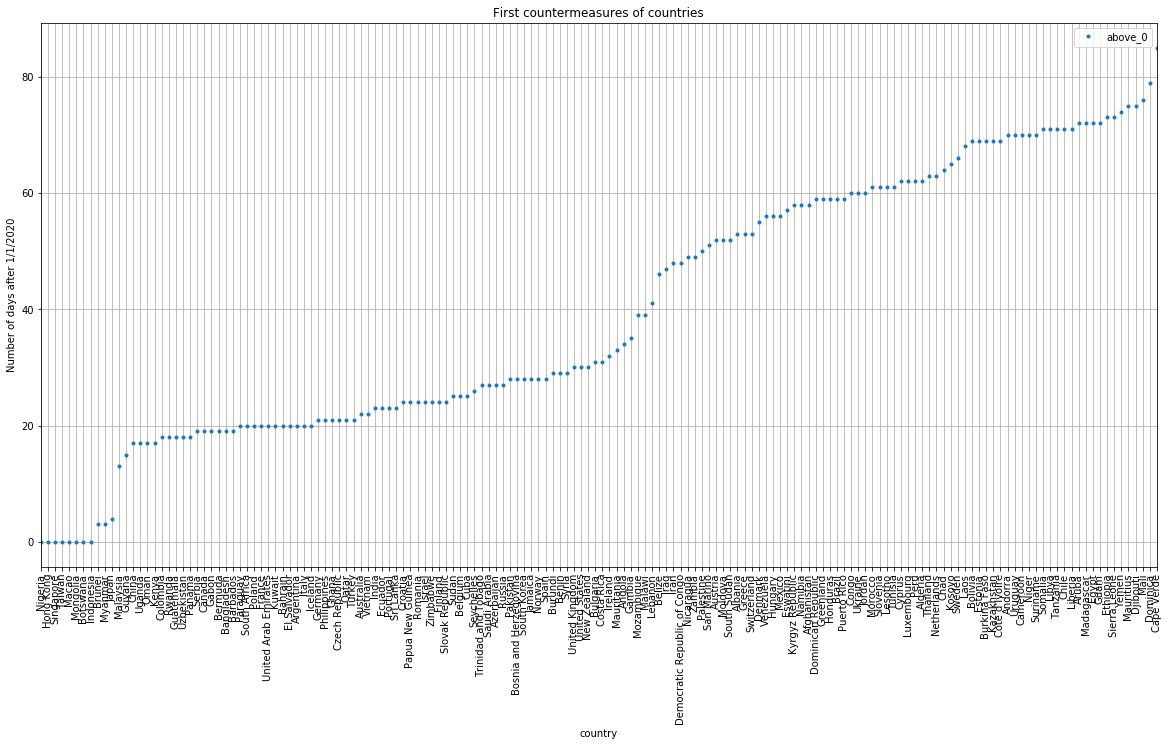

In [24]:
%matplotlib inline
ax = stringency_df.sort_values(by='above_0').plot(title='First countermeasures of countries',style='.',x = 'country', y='above_0',grid=True, figsize=(20,10), xticks=stringency_df.index, rot=90)

ax.set_xticklabels(stringency_df.sort_values(by='above_0').country, rotation=90);
ax.set_ylabel('Number of days after 1/1/2020');

Gives an overview but not very pretty. 

Next we will look into how many days after first confirmed case, the countermeasures were initiated. 

In [25]:
confirmed_df.head()


,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2704.0,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0
3,AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,795.0,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0


This starts 22'nd of January while the other starts 1'st of January. So we need to compensate for this. 

In [26]:

confirmed_df['first_case'] = confirmed_df.iloc[:,1:].apply(lambda x: (np.where( x > 0)[0][0]), axis=1)
confirmed_df.head()

,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,first_case
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,51
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0,33
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0,58
3,AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,66
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0,47


In [27]:
confirmed_df['first_case']= confirmed_df['first_case'] + 21
confirmed_df.head()

,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,first_case
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,72
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0,54
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0,79
3,AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,87
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0,68


How many days are between the first case and the first countermeasures?

In [28]:
reaction_time_df = stringency_df.merge(confirmed_df, on='country_code')[['country', 'country_code','first_case']+stringency_cols]
reaction_time_df.head()

,country,country_code,first_case,above_0,above_10,above_20,above_30,above_40,above_50,above_60,above_70,above_80,above_90
0,Aruba,ABW,72,72,73,73,75,78,78,86,86,106,120
1,Afghanistan,AFG,54,58,58,58,71,71,81,82,85,132,132
2,Angola,AGO,79,34,77,81,81,81,82,84,84,84,84
3,Albania,ALB,68,53,66,66,66,67,68,70,70,72,132
4,Andorra,AND,61,70,70,71,71,73,82,82,96,132,132


In [29]:
reaction_time_df[stringency_cols]=reaction_time_df[stringency_cols].apply(lambda x: x - reaction_time_df['first_case'])

In [30]:
reaction_time_df.head()

,country,country_code,first_case,above_0,above_10,above_20,above_30,above_40,above_50,above_60,above_70,above_80,above_90
0,Aruba,ABW,72,0,1,1,3,6,6,14,14,34,48
1,Afghanistan,AFG,54,4,4,4,17,17,27,28,31,78,78
2,Angola,AGO,79,-45,-2,2,2,2,3,5,5,5,5
3,Albania,ALB,68,-15,-2,-2,-2,-1,0,2,2,4,64
4,Andorra,AND,61,9,9,10,10,12,21,21,35,71,71


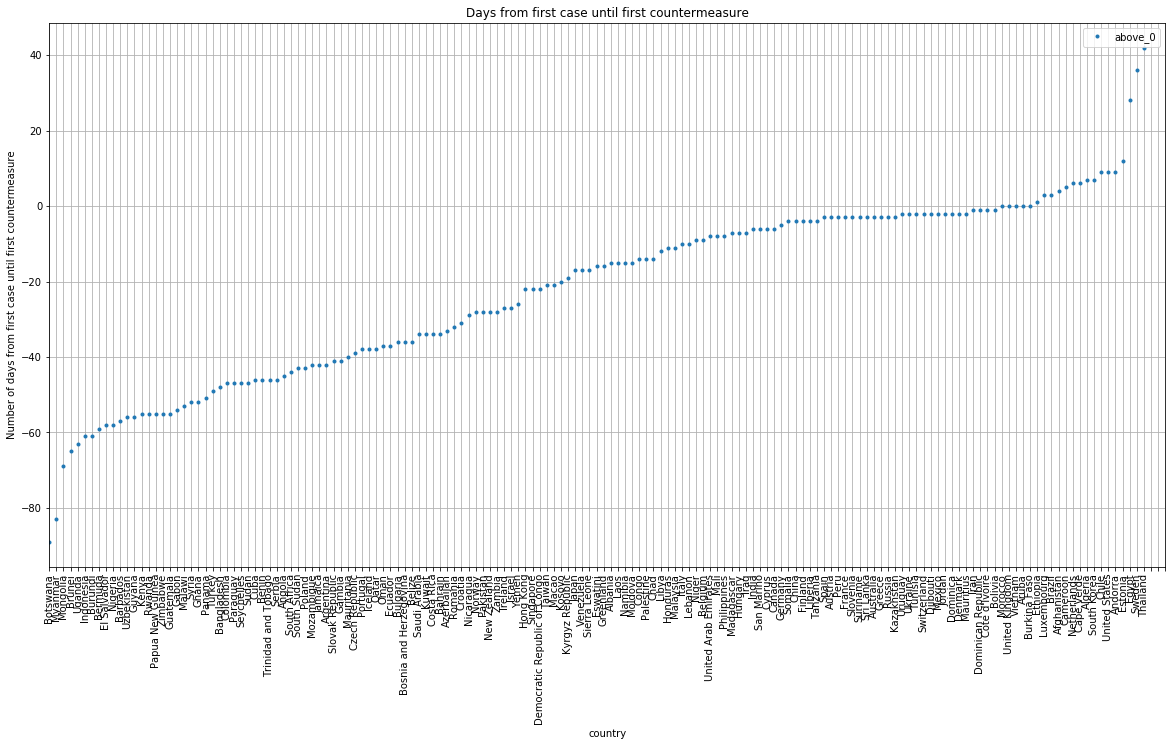

In [31]:
ax = reaction_time_df.sort_values(by='above_0').plot(title='Days from first case until first countermeasure',style='.',x = 'country', y='above_0',grid=True, figsize=(20,10), xticks=stringency_df.index, rot=90)

ax.set_xticklabels(reaction_time_df.sort_values(by='above_0').country, rotation=90);
ax.set_ylabel('Number of days from first case until first countermeasure');

Observation: The majority of countries initiated first countermeasures before first confirmed case. 


## Correlation between timing of countermeasures and total number of dead

Is there a correlation between when countermeasures were initiated and current number of dead per million?


In [32]:
dead_per_million_df.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.895555,18.895555,18.895555,28.343332,28.343332,28.343332,28.343332,28.343332,28.343332,105845.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.421152,2.555661,2.797776,2.851579,2.932284,3.093694,3.228203,3.282006,3.416515,37172386.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,30809762.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14731.0
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,2866376.0


In [33]:
last_date = dead_per_million_df.columns[-2]
reaction_time_df = reaction_time_df.merge(dead_per_million_df[['country_code', last_date]], on='country_code')
reaction_time_df.rename(columns={last_date: "dead_per_million"}, inplace=True)
reaction_time_df['dead_per_million']= pd.to_numeric(reaction_time_df['dead_per_million'], errors='coerce')

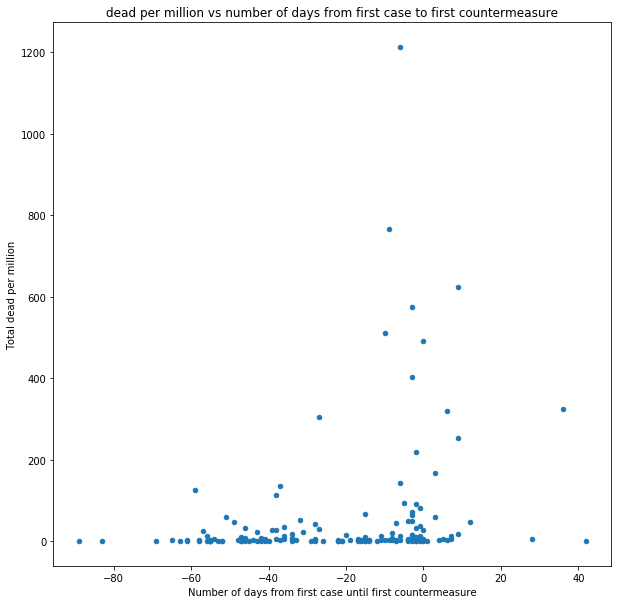

In [34]:
ax = reaction_time_df.plot.scatter(title='dead per million vs number of days from first case to first countermeasure',x='above_0', y='dead_per_million', figsize=(10,10))
ax.set_xlabel('Number of days from first case until first countermeasure');
ax.set_ylabel('Total dead per million');



In [35]:
def get_a(X,Y):
    N = len(X)
    s1 = sum([x*y for x,y in zip(X,Y)])
    s2 = sum([x*x for x in X])
    return ((s1 - N*np.mean(X)*np.mean(Y)) / (s2 - N*np.mean(X)*np.mean(X)))
  
def get_b(X,Y):
    return np.mean(Y - get_a(X,Y)*np.mean(X))

def get_y(a,b,x):
    return a*x + b

def linReg(x,y):
    line_y = []
    a = get_a(x,y)
    b = get_b(x,y)
    for v in x:
        line_y.append(get_y(a,b,v))
    return line_y


In [36]:
reaction_time_df.head()

,country,country_code,first_case,above_0,above_10,above_20,above_30,above_40,above_50,above_60,above_70,above_80,above_90,dead_per_million
0,Aruba,ABW,72,0,1,1,3,6,6,14,14,34,48,28.343332
1,Afghanistan,AFG,54,4,4,4,17,17,27,28,31,78,78,3.416515
2,Angola,AGO,79,-45,-2,2,2,2,3,5,5,5,5,0.064914
3,Albania,ALB,68,-15,-2,-2,-2,-1,0,2,2,4,64,10.815050
4,Andorra,AND,61,9,9,10,10,12,21,21,35,71,71,623.328052


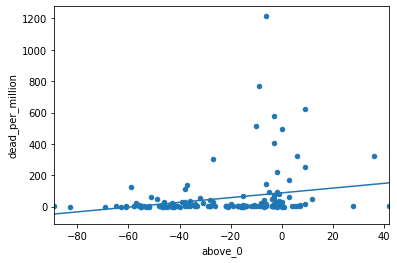

In [37]:
lin_reg_df = reaction_time_df.copy()

z = np.polyfit(x=reaction_time_df.loc[:, 'above_0'], y=reaction_time_df.loc[:, 'dead_per_million'], deg=1)
p = np.poly1d(z)
lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'above_0'])

ax = lin_reg_df.plot.scatter(x='above_0', y='dead_per_million')
lin_reg_df.set_index('above_0', inplace=True)
lin_reg_df.trendline.sort_index(ascending=False).plot(ax=ax)


In [38]:
def SStot(Y):
    return sum([(y-np.mean(Y))*(y-np.mean(Y)) for y in Y])

def SSres(Y, Y_pred):
    return sum([(y-y_pred)*(y-y_pred) for y,y_pred in zip(Y,Y_pred)])

def R_squared(Y,Y_pred):
    return 1- (SSres(Y,Y_pred)/SStot(Y))


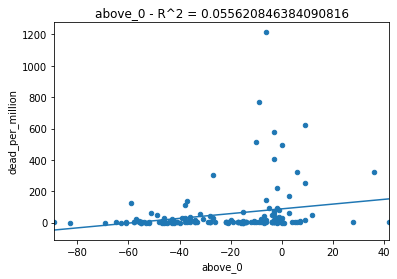

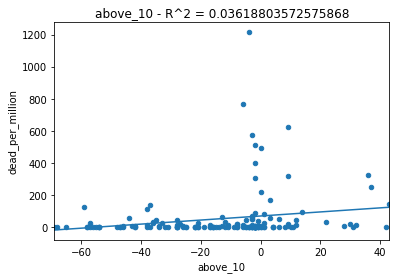

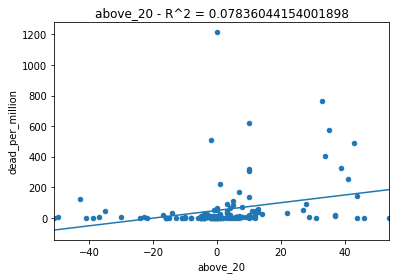

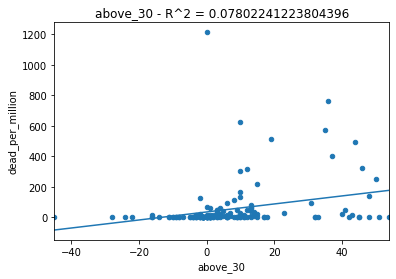

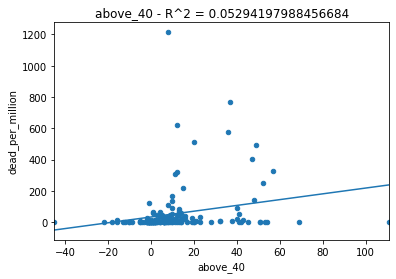

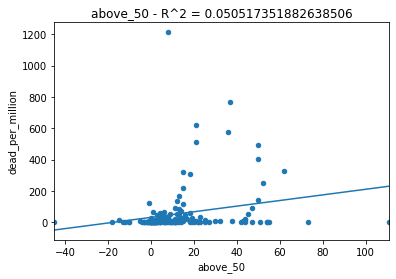

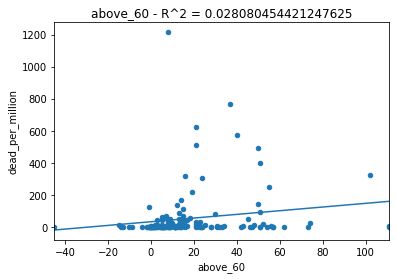

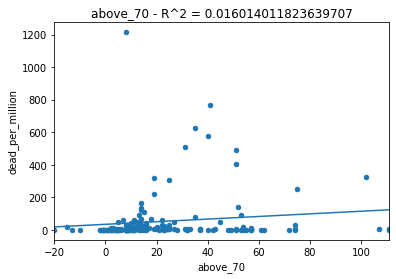

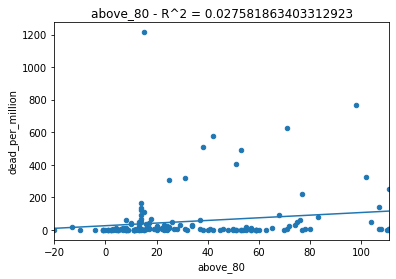

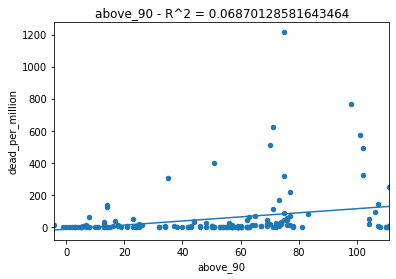

In [39]:
for i in range(10):
    lin_reg_df = reaction_time_df.copy()
    num = str(i*10)
    z = np.polyfit(x=reaction_time_df.loc[:, 'above_'+num], y=reaction_time_df.loc[:, 'dead_per_million'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'above_'+num])
    ax = lin_reg_df.plot.scatter(x='above_'+num, y='dead_per_million')
    lin_reg_df.set_index('above_'+num, inplace=True)
    
    r = R_squared(list(reaction_time_df['dead_per_million']), list(lin_reg_df['trendline']))
    lin_reg_df.trendline.sort_index(ascending=False).plot(title='above_'+num +' - R^2 = '+str(r),ax=ax)


Not a very strong correlation.

## Specific countermeasures

In [40]:
countermeasures_list = [item for item in list(countermeasure_dfs.keys()) if (item.startswith('c') and '_' in item and not 'flag' in item)]

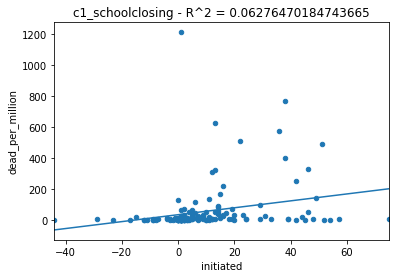

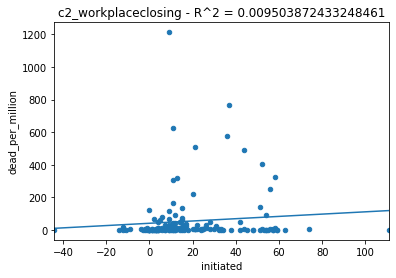

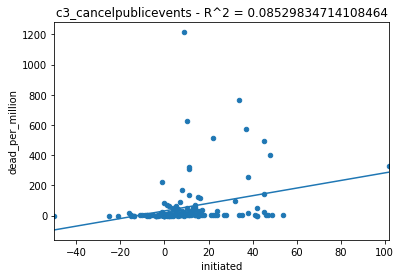

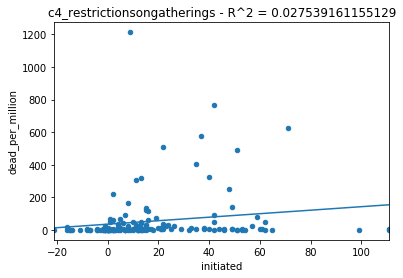

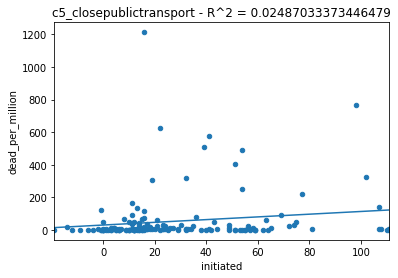

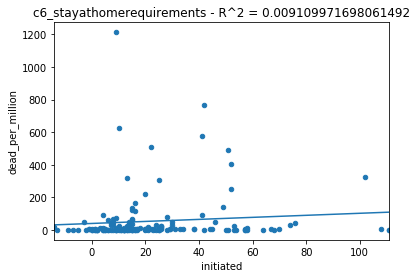

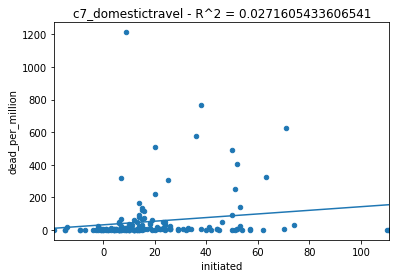

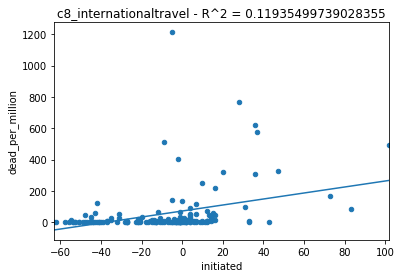

In [41]:

for measure in countermeasures_list:
    lin_reg_df = countermeasure_dfs[measure].copy()
    
    

    lin_reg_df['initiated'] = lin_reg_df.iloc[:,3:len(date_cols)+2].apply(pd.to_numeric, errors='coerce', axis=1).apply(lambda x: (np.where( x > (0))[0]), axis=1)
    lin_reg_df['initiated'] = lin_reg_df['initiated'].apply(getFirst)

    lin_reg_df = lin_reg_df.merge(confirmed_df, on='country_code')[['country', 'country_code','first_case','initiated']]

    lin_reg_df = lin_reg_df.merge(dead_per_million_df[['country_code', last_date]], on='country_code')
    lin_reg_df.rename(columns={last_date: "dead_per_million"}, inplace=True)
    lin_reg_df['dead_per_million']= pd.to_numeric(lin_reg_df['dead_per_million'], errors='coerce')

    lin_reg_df['initiated']=lin_reg_df['initiated']- lin_reg_df['first_case']

    z = np.polyfit(x=lin_reg_df.loc[:, 'initiated'], y=lin_reg_df.loc[:, 'dead_per_million'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'initiated'])
    ax = lin_reg_df.plot.scatter(x='initiated', y='dead_per_million')
    lin_reg_df.set_index('initiated', inplace=True)

    r = R_squared(list(reaction_time_df['dead_per_million']), list(lin_reg_df['trendline']))
    lin_reg_df.trendline.sort_index(ascending=False).plot(title=measure +' - R^2 = '+str(r),ax=ax)

    

No correlation at all

## Using dead 100 days after first case instead of current dead

In [42]:
confirmed_df.head()

,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,first_case
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,72
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0,54
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0,79
3,AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,87
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0,68


In [43]:
dead_after_days = confirmed_df.copy()[['country_code','first_case']]

In [44]:
dead_after_days.head()

,country_code,first_case
0,ABW,72
1,AFG,54
2,AGO,79
3,AIA,87
4,ALB,68


In [45]:
dead_after_days['first_case_date'] = dead_after_days['first_case'].apply(lambda x: date_cols[x])

In [46]:
date_cols

Index(['1/2/20', '1/3/20', '1/4/20', '1/5/20', '1/6/20', '1/7/20', '1/8/20',
       '1/9/20', '1/10/20', '1/11/20',
       ...
       '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20',
       '5/10/20', '5/11/20', '5/12/20'],
      dtype='object', length=132)

In [47]:
dead_after_days.head()

,country_code,first_case,first_case_date
0,ABW,72,3/14/20
1,AFG,54,2/25/20
2,AGO,79,3/21/20
3,AIA,87,3/29/20
4,ALB,68,3/10/20


In [48]:
dead_after_days = dead_after_days.merge(dead_per_million_df, on='country_code')

In [49]:
dead_after_days.head()

,country_code,first_case,first_case_date,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
0,ABW,72,3/14/20,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,...,18.895555,18.895555,18.895555,28.343332,28.343332,28.343332,28.343332,28.343332,28.343332,105845.0
1,AFG,54,2/25/20,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,...,2.421152,2.555661,2.797776,2.851579,2.932284,3.093694,3.228203,3.282006,3.416515,37172386.0
2,AGO,79,3/21/20,Angola,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,30809762.0
3,AIA,87,3/29/20,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14731.0
4,ALB,68,3/10/20,Albania,0.0,0.0,0.0,0.0,0.0,0.0,...,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,2866376.0


Only use countries where first case was before 1'st of March. This is day number 60.

In [50]:
date_cols[60]

'3/2/20'

In [51]:
dead_after_days = dead_after_days[dead_after_days.first_case <= 60].reset_index(drop=True).copy()

In [52]:
#Dead after 30 days
dead_after_days['date_after_30_days'] = dead_after_days['first_case'].apply(lambda x: date_cols[x+30])

#dead_after_days['dead_after_30_days'] = dead_after_days['date_after_30_days'].copy()
for index, row in dead_after_days.iterrows():
    dead_after_days.at[index,'dead_after_30_days'] = dead_after_days[row['date_after_30_days']][index]
    


In [53]:
#Dead after 60 days
dead_after_days['date_after_60_days'] = dead_after_days['first_case'].apply(lambda x: date_cols[x+60])

for index, row in dead_after_days.iterrows():
    dead_after_days.at[index,'dead_after_60_days'] = dead_after_days[row['date_after_60_days']][index]

In [54]:
dead_after_days['dead_after_30_days']

0       0.107607
1       0.000000
2       1.355116
3       0.000000
4       6.560699
5       0.503028
6       0.000000
7       2.548681
8       0.000000
9       0.529911
10      0.000000
11     27.134247
12      1.752673
13      3.668887
14      0.000000
15     12.427429
16      5.363613
17      0.615699
18      5.443576
19      0.020320
20      0.021369
21      2.269328
22      0.000000
23      0.014930
24      0.000000
25      0.000000
26      2.981813
27      0.268420
28      0.733883
29      0.000000
         ...    
37      0.000000
38      0.038755
39      0.000000
40      0.584033
41      0.000000
42      2.498623
43     37.832059
44      0.000000
45     25.851817
46      0.221886
47      1.920346
48      0.000000
49      0.010211
50     44.743316
51      4.329888
52      0.000000
53      0.206569
54      0.000000
55      0.056546
56      0.009376
57      0.718991
58      1.900736
59      0.000000
60      0.000000
61    651.176558
62      0.000000
63      0.000000
64      0.0421

In [55]:
new_reaction_time_df = reaction_time_df.merge(dead_after_days[['country_code','dead_after_30_days','dead_after_60_days']], on='country_code')

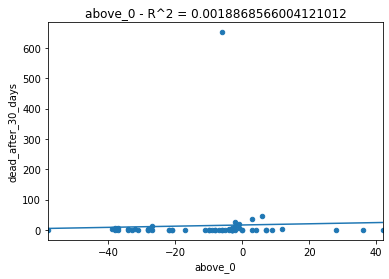

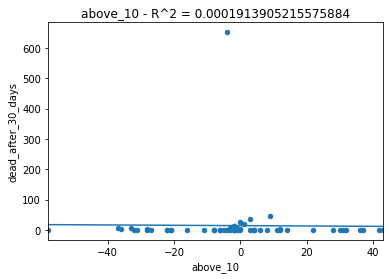

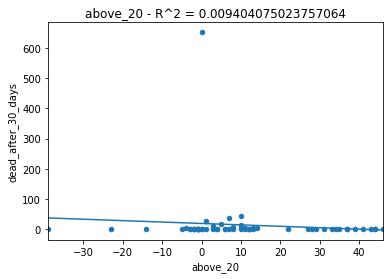

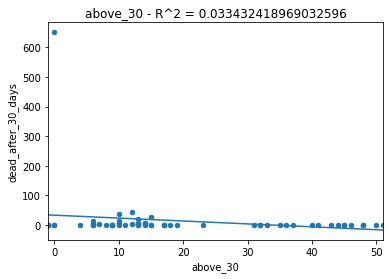

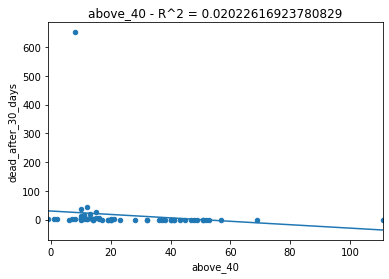

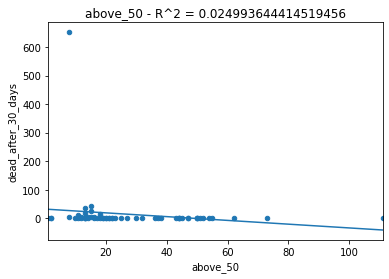

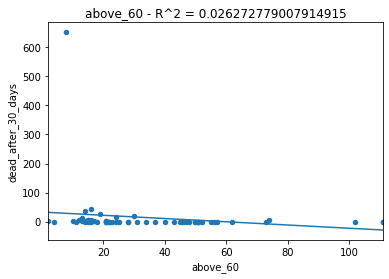

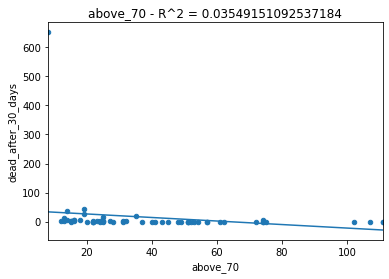

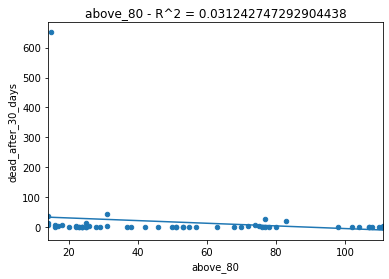

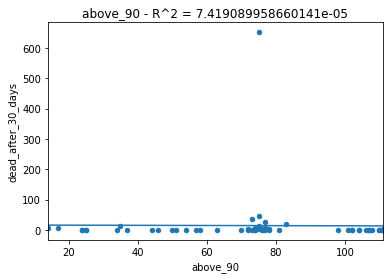

In [56]:
for i in range(10):
    lin_reg_df = new_reaction_time_df.copy()
    num = str(i*10)
    z = np.polyfit(x=new_reaction_time_df.loc[:, 'above_'+num], y=new_reaction_time_df.loc[:, 'dead_after_30_days'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'above_'+num])
    ax = lin_reg_df.plot.scatter(x='above_'+num, y='dead_after_30_days')
    lin_reg_df.set_index('above_'+num, inplace=True)
    
    r = R_squared(list(new_reaction_time_df['dead_after_30_days']), list(lin_reg_df['trendline']))
    lin_reg_df.trendline.sort_index(ascending=False).plot(title='above_'+num +' - R^2 = '+str(r),ax=ax)


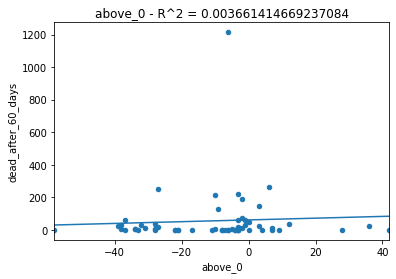

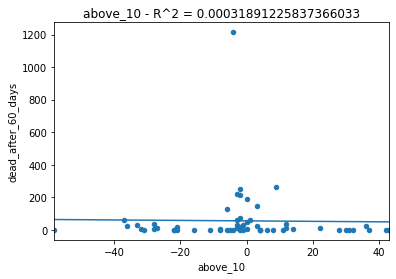

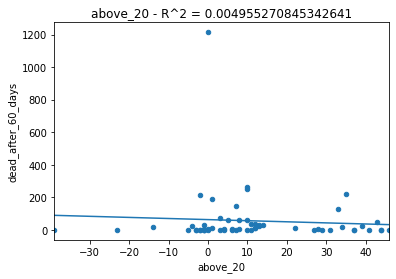

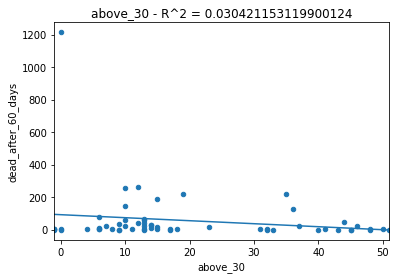

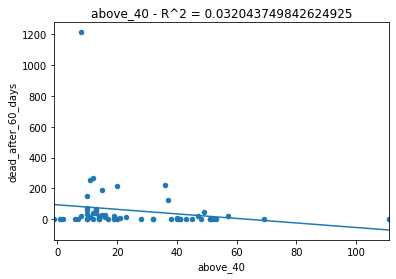

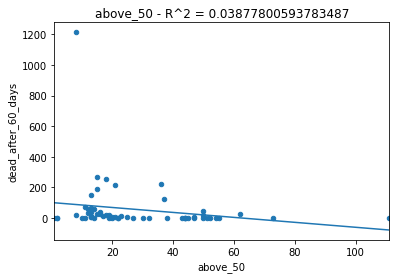

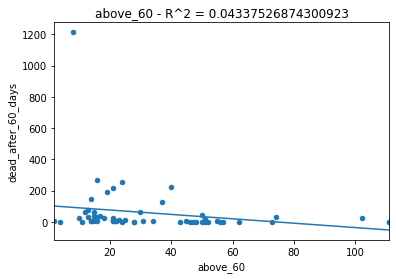

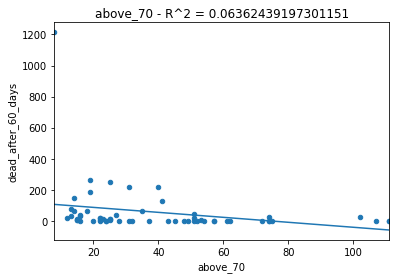

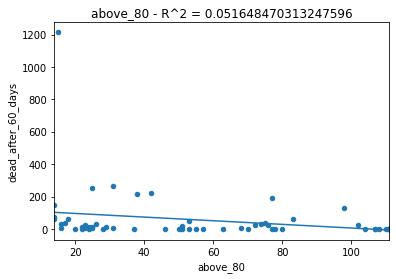

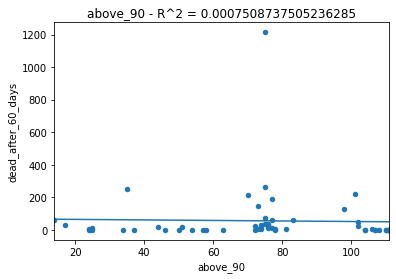

In [57]:
for i in range(10):
    lin_reg_df = new_reaction_time_df.copy()
    num = str(i*10)
    z = np.polyfit(x=new_reaction_time_df.loc[:, 'above_'+num], y=new_reaction_time_df.loc[:, 'dead_after_60_days'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'above_'+num])
    ax = lin_reg_df.plot.scatter(x='above_'+num, y='dead_after_60_days')
    lin_reg_df.set_index('above_'+num, inplace=True)
    
    r = R_squared(list(new_reaction_time_df['dead_after_60_days']), list(lin_reg_df['trendline']))
    lin_reg_df.trendline.sort_index(ascending=False).plot(title='above_'+num +' - R^2 = '+str(r),ax=ax)


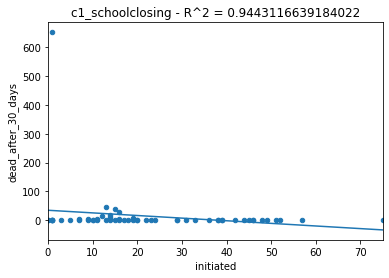

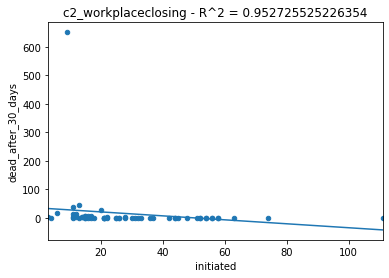

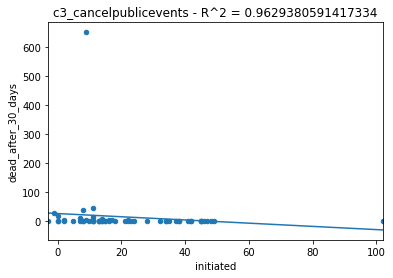

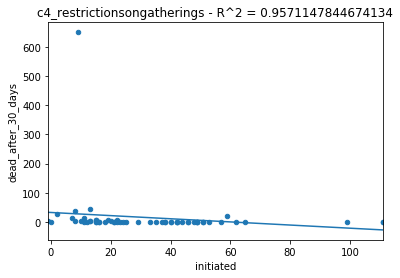

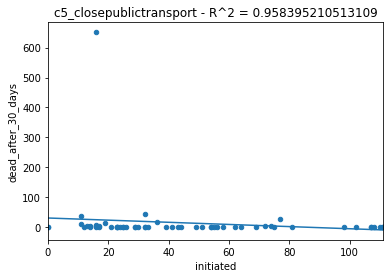

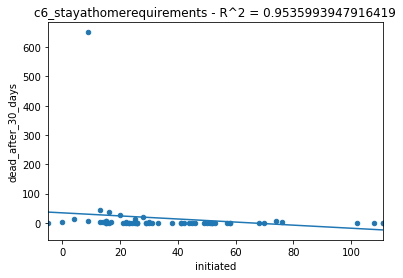

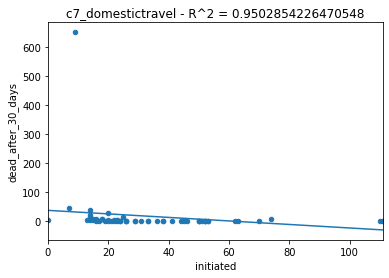

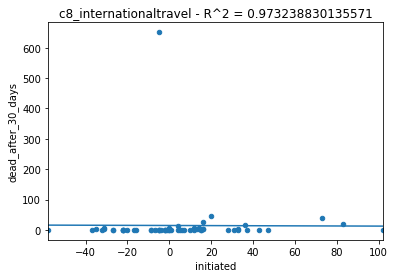

In [58]:

for measure in countermeasures_list:
    lin_reg_df = countermeasure_dfs[measure].copy()
    
    

    lin_reg_df['initiated'] = lin_reg_df.iloc[:,3:len(date_cols)+2].apply(pd.to_numeric, errors='coerce', axis=1).apply(lambda x: (np.where( x > (0))[0]), axis=1)
    lin_reg_df['initiated'] = lin_reg_df['initiated'].apply(getFirst)

    lin_reg_df = lin_reg_df.merge(confirmed_df, on='country_code')[['country', 'country_code','first_case','initiated']]

    #lin_reg_df = lin_reg_df.merge(dead_per_million_df[['country_code', last_date]], on='country_code')
    lin_reg_df = lin_reg_df.merge(dead_after_days[['country_code','dead_after_30_days','dead_after_60_days']], on='country_code')
    
    #lin_reg_df.rename(columns={last_date: "dead_per_million"}, inplace=True)
    #lin_reg_df['dead_per_million']= pd.to_numeric(lin_reg_df['dead_per_million'], errors='coerce')

    lin_reg_df['initiated']=lin_reg_df['initiated']- lin_reg_df['first_case']

    z = np.polyfit(x=lin_reg_df.loc[:, 'initiated'], y=lin_reg_df.loc[:, 'dead_after_30_days'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'initiated'])
    ax = lin_reg_df.plot.scatter(x='initiated', y='dead_after_30_days')
    lin_reg_df.set_index('initiated', inplace=True)

    r = R_squared(list(dead_after_days['dead_after_30_days']), list(lin_reg_df['trendline']))
    lin_reg_df.trendline.sort_index(ascending=False).plot(title=measure +' - R^2 = '+str(r),ax=ax)

    

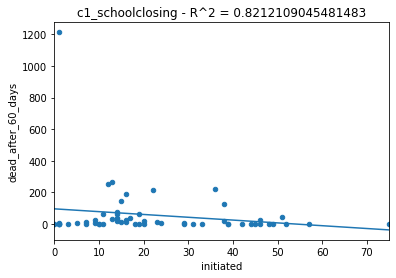

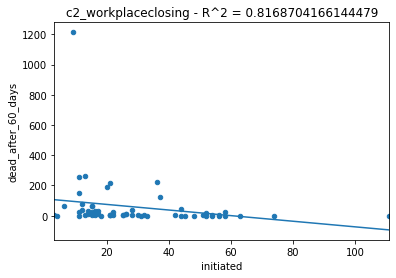

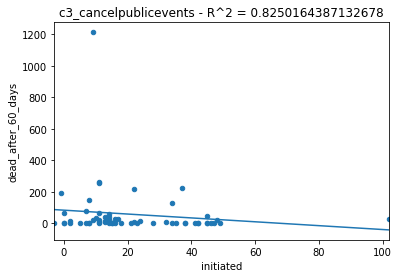

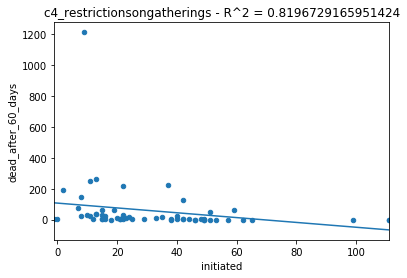

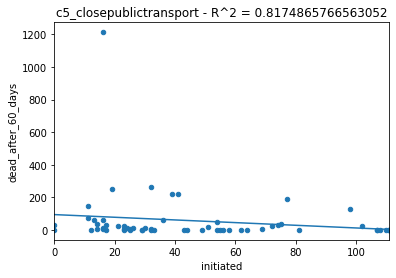

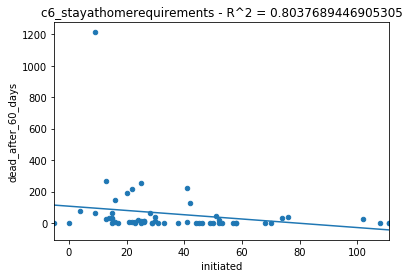

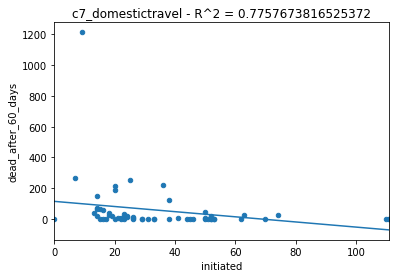

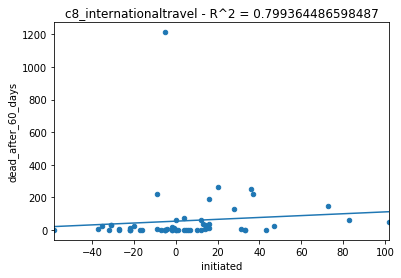

In [59]:

for measure in countermeasures_list:
    lin_reg_df = countermeasure_dfs[measure].copy()
    
    

    lin_reg_df['initiated'] = lin_reg_df.iloc[:,3:len(date_cols)+2].apply(pd.to_numeric, errors='coerce', axis=1).apply(lambda x: (np.where( x > (0))[0]), axis=1)
    lin_reg_df['initiated'] = lin_reg_df['initiated'].apply(getFirst)

    lin_reg_df = lin_reg_df.merge(confirmed_df, on='country_code')[['country', 'country_code','first_case','initiated']]

    #lin_reg_df = lin_reg_df.merge(dead_per_million_df[['country_code', last_date]], on='country_code')
    lin_reg_df = lin_reg_df.merge(dead_after_days[['country_code','dead_after_30_days','dead_after_60_days']], on='country_code')
    
    #lin_reg_df.rename(columns={last_date: "dead_per_million"}, inplace=True)
    #lin_reg_df['dead_per_million']= pd.to_numeric(lin_reg_df['dead_per_million'], errors='coerce')

    lin_reg_df['initiated']=lin_reg_df['initiated']- lin_reg_df['first_case']

    z = np.polyfit(x=lin_reg_df.loc[:, 'initiated'], y=lin_reg_df.loc[:, 'dead_after_60_days'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'initiated'])
    ax = lin_reg_df.plot.scatter(x='initiated', y='dead_after_60_days')
    lin_reg_df.set_index('initiated', inplace=True)

    r = R_squared(list(dead_after_days['dead_after_60_days']), list(lin_reg_df['trendline']))
    lin_reg_df.trendline.sort_index(ascending=False).plot(title=measure +' - R^2 = '+str(r),ax=ax)

    

## Population density

In [60]:
file = '../data/population_density.csv'
#Read csv file using pandas
population_density = pd.read_csv(file)
population_density.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1961,6.976239
1,Arab World,ARB,1962,7.169853
2,Arab World,ARB,1963,7.370144
3,Arab World,ARB,1964,7.577779
4,Arab World,ARB,1965,7.793214


In [61]:
population_density['Year'].max()

2016

In [62]:
population_density = population_density[population_density['Year'] == 2016]

In [63]:
population_density = population_density[['Country Code', 'Value']]
population_density.columns=['country_code', 'population_density']

In [64]:
new_df = population_density.merge(dead_after_days, on='country_code')[['country_code','population_density', 'dead_after_30_days', 'dead_after_60_days']]

In [65]:
new_df.head()

,country_code,population_density,dead_after_30_days,dead_after_60_days
0,AFG,53.083405,0.107607,1.264379
1,DZA,17.048895,0.615699,10.064310
2,ARM,102.733263,1.355116,11.179710
3,AUS,3.151505,0.000000,0.520360
4,AUT,105.806515,6.560699,61.308604


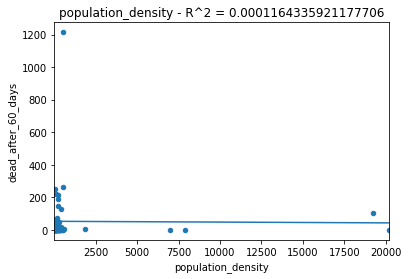

In [66]:
lin_reg_df= new_df.copy()
z = np.polyfit(x=new_df.loc[:, 'population_density'], y=new_df.loc[:, 'dead_after_60_days'], deg=1)
p = np.poly1d(z)
lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'population_density'])
ax = lin_reg_df.plot.scatter(x='population_density', y='dead_after_60_days')
lin_reg_df.set_index('population_density', inplace=True)

r = R_squared(list(new_df['dead_after_60_days']), list(lin_reg_df['trendline']))
lin_reg_df.trendline.sort_index(ascending=False).plot(title='population_density' +' - R^2 = '+str(r),ax=ax)


## Machine learning

In [67]:
relevant_data = population_density.copy()


In [68]:
relevant_data=relevant_data.merge(stringency_df, on='country_code')[['country_code','population_density','above_0','above_10','above_20','above_30','above_40','above_50','above_60']]
relevant_data = relevant_data.merge(dead_after_days[['country_code','dead_after_60_days']], on='country_code')

In [69]:
relevant_data.head()

,country_code,population_density,above_0,above_10,above_20,above_30,above_40,above_50,above_60,dead_after_60_days
0,AFG,53.083405,58,58,58,71,71,81,82,1.264379
1,DZA,17.048895,62,67,67,69,69,80,80,10.064310
2,AUS,3.151505,22,29,31,73,76,80,81,0.520360
3,AUT,105.806515,52,52,63,68,68,69,70,61.308604
4,AZE,118.043284,27,55,57,60,67,71,76,2.515141


In [70]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(relevant_data, test_size=0.2)

In [71]:
# create x part by removing category, hour and date
x_train = train.drop(['dead_after_60_days','country_code'], axis=1)
x_train_data = x_train.values

x_test = test.drop(['dead_after_60_days','country_code'], axis=1)
x_test_data = x_test.values

# create y part by only selecting category
y_train = train[['dead_after_60_days']]
y_train_data = y_train.values
y_train_data = y_train_data.ravel()

y_test = test[['dead_after_60_days']]
y_test_data = y_test.values
y_test_data = y_test_data.ravel()

In [72]:

from sklearn import ensemble
clf = ensemble.RandomForestRegressor()
clf = clf.fit(x_train_data, y_train_data)

/Users/marita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
predicted = clf.predict(x_test_data)

In [74]:
from sklearn.metrics import r2_score
print(r2_score(y_test_data, predicted)) 

-6.454069856694802
